## 83

In [2]:
%load_ext autoreload
%autoreload 2
from hypopredict.fusion.ml_preproc import MLPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pickle

path = '/Users/alexxela/code/hypopredict/data/processed/83_ml_prepped_split_20251217_182801.pkl'
loaded_dict_test = MLPreprocessor().load_prepped_splits(path)
split_prepped_test = loaded_dict_test['splits_prepped']

# carefully drop na values from each split
SPLIT_INDEX = 0
split_prepped_test[SPLIT_INDEX][0]['target'] = split_prepped_test[SPLIT_INDEX][1].copy()
split_prepped_test[SPLIT_INDEX][0].dropna(inplace=True)
split_prepped_test[SPLIT_INDEX] = (split_prepped_test[SPLIT_INDEX][0].drop('target', axis=1),
                                split_prepped_test[SPLIT_INDEX][0]['target'].to_numpy())
# stack X_trains from other splits
X_test = split_prepped_test[0][0]
y_test = split_prepped_test[0][1]

# load dictionary of models
path = 'FUSION2PATH'









model_path = '/Users/alexxela/code/hypopredict/hypopredict/fusion/fusion 2.0 - finer chunking/fusion2_model_trained_dict_0_164.pkl'
with open(model_path, 'rb') as f:
    models_dict = pickle.load(f)
xgb = models_dict['xgb']
svm = models_dict['svm']
knn = models_dict['knn']
fusion = models_dict['fusion']

y_probs_test_xgb = xgb.predict_proba(X_test)[:, 1]
y_probs_test_svm = svm.predict_proba(X_test)[:, 1]
y_probs_test_knn = knn.predict_proba(X_test)[:, 1]

X_test_fusion = pd.DataFrame({
    'xgb_prob': y_probs_test_xgb,
    'svm_prob': y_probs_test_svm,
    'knn_prob': y_probs_test_knn
})

y_probs_test_fusion = fusion.predict_proba(X_test_fusion)[:, 1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1285


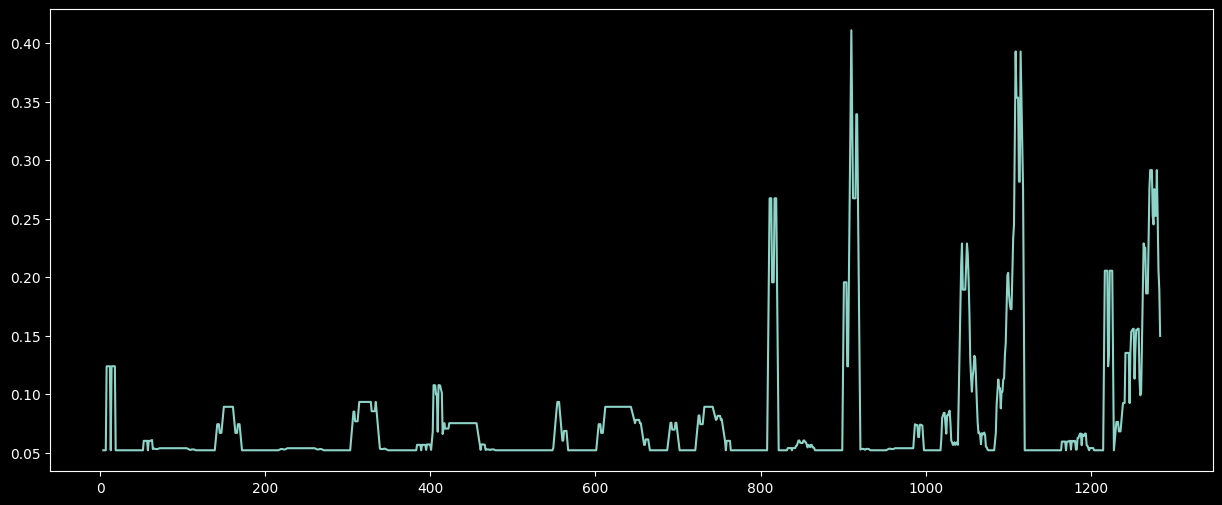

In [4]:
plt.style.use('dark_background')
print(len(y_probs_test_fusion))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_probs_test_fusion).rolling(5).mean());

## 64

In [5]:
path = '/Users/alexxela/code/hypopredict/data/processed/64_ml_prepped_split_20251217_183629.pkl'
loaded_dict_test = MLPreprocessor().load_prepped_splits(path)
split_prepped_test = loaded_dict_test['splits_prepped']

# carefully drop na values from each split
SPLIT_INDEX = 0
split_prepped_test[SPLIT_INDEX][0]['target'] = split_prepped_test[SPLIT_INDEX][1].copy()
split_prepped_test[SPLIT_INDEX][0].dropna(inplace=True)
split_prepped_test[SPLIT_INDEX] = (split_prepped_test[SPLIT_INDEX][0].drop('target', axis=1),
                                split_prepped_test[SPLIT_INDEX][0]['target'].to_numpy())
# stack X_trains from other splits
X_test = split_prepped_test[0][0]
y_test = split_prepped_test[0][1]

y_probs_test_xgb = xgb.predict_proba(X_test)[:, 1]
y_probs_test_svm = svm.predict_proba(X_test)[:, 1]
y_probs_test_knn = knn.predict_proba(X_test)[:, 1]

X_test_fusion = pd.DataFrame({
    'xgb_prob': y_probs_test_xgb,
    'svm_prob': y_probs_test_svm,
    'knn_prob': y_probs_test_knn
})

y_probs_test_fusion = fusion.predict_proba(X_test_fusion)[:, 1]


706


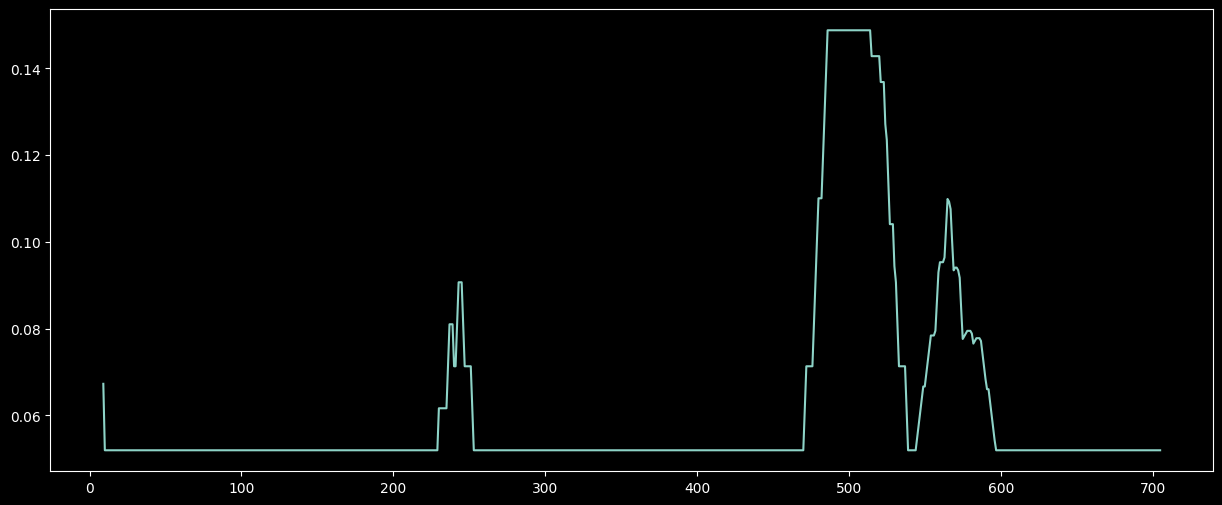

In [6]:
print(len(y_probs_test_fusion))
plt.figure(figsize=(15, 6))
plt.plot(pd.Series(y_probs_test_fusion).rolling(10).mean());